In [100]:
import pandas as pd

import os
from glob import glob
from collections import Counter
import pickle

#from tqdm import tqdm, tqdm_notebook
from tqdm.notebook import trange, tqdm
#tqdm.pandas()

In [19]:
import pyarrow.parquet as pq

In [126]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\_v010ch_\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [108]:
DATA = './data'
DATA_OWN = './data_own'
CLICKSTREAM = 'alfabattle2_abattle_clickstream'

#device_is_webview   always   True

timestamp - дата и время совершения события    
application_id - идентификатор приложения    
client	- Идентификатор клиента     
session_id - Идентификатор сессии    
event_type - Тип события    
event_category - Категория события    
event_name - Имя события    
event_label - Дополнительный атрибут события    
device_screen_name - Имя экрана на котором произошло событие    
timezone - Часовой пояс    
device_is_webview - Флаг того что страница открыта внутри webview    
page_urlhost - Домен страницы    
page_urlpath_full - Путь страницы    
net_connection_type - Тип подключения    
net_connection_tech - Технология подключения    

In [4]:
files = sorted(glob(os.path.join(DATA, CLICKSTREAM, 'part*')))
files

['./data\\alfabattle2_abattle_clickstream\\part-00000.parquet',
 './data\\alfabattle2_abattle_clickstream\\part-00001.parquet',
 './data\\alfabattle2_abattle_clickstream\\part-00002.parquet',
 './data\\alfabattle2_abattle_clickstream\\part-00003.parquet',
 './data\\alfabattle2_abattle_clickstream\\part-00004.parquet',
 './data\\alfabattle2_abattle_clickstream\\part-00005.parquet',
 './data\\alfabattle2_abattle_clickstream\\part-00006.parquet',
 './data\\alfabattle2_abattle_clickstream\\part-00007.parquet',
 './data\\alfabattle2_abattle_clickstream\\part-00008.parquet',
 './data\\alfabattle2_abattle_clickstream\\part-00009.parquet']

In [5]:
%%time
data = pd.read_parquet(files[0])#, engine='fastparquet')
data.shape

Wall time: 12.2 s


(12468595, 15)

In [13]:
data.keys()

Index(['timestamp', 'application_id', 'client', 'session_id', 'event_type',
       'event_category', 'event_name', 'event_label', 'device_screen_name',
       'timezone', 'device_is_webview', 'page_urlhost', 'page_urlpath_full',
       'net_connection_type', 'net_connection_tech'],
      dtype='object')

In [27]:
data.application_id.unique()

array(['anketa', 'mobile', 'ncl', 'passport_metrics',
       'retail-marketplace', 'retail-taxes-ui',
       'retail-upsale-consent-ui', 'retail-upsale-ui',
       'retail_cards_activation', 'retail_cards_insurance_antifraud_sale',
       'retail_cards_pin_change', 'retail_credit_cards_insurance_sale',
       'retail_debit_card_order',
       'retail_digital_wealth_management_main_ui',
       'retail_insurance_sale', 'retail_izk', 'retail_realty_insurance',
       'retail_upsale_cards', 'retail_upsale_credit_holidays_ui',
       'retail_upsale_documents_upload_ui', 'retail_upsale_ui',
       'retail_upsale_verification', 'site'], dtype=object)

In [1]:
#data.info()

In [14]:
data.head()

,timestamp,application_id,client,session_id,event_type,event_category,event_name,event_label,device_screen_name,timezone,device_is_webview,page_urlhost,page_urlpath_full,net_connection_type,net_connection_tech
0,2020-01-15 08:46:32.579,anketa,107efb4507525ce982e19331b36b0e2f,9a1366886da59ec85f0ef5e06f1e97f6,pv,None,None,None,None,Asia/Omsk,True,anketa.alfabank.ru,03eb3ceab6204f8b602f1863f7fbce01,None,None
1,2020-04-29 19:20:09.705,anketa,32dac9ab28a497a8061e02786bb3a95a,bdf7fc21e4e88d1b4f0838c80b21a1e3,pv,None,None,None,None,Asia/Yekaterinburg,True,anketa.alfabank.ru,03eb3ceab6204f8b602f1863f7fbce01,None,None
2,2020-02-21 03:21:24.058,anketa,489818f57087b59790435b3acf18018a,8bae6c4249db74dc0937e1ff00d61079,pv,None,None,None,None,Asia/Yakutsk,True,anketa.alfabank.ru,03eb3ceab6204f8b602f1863f7fbce01,None,None
3,2020-08-06 06:54:30.918,anketa,489818f57087b59790435b3acf18018a,3a95ba68795b745ca09ebee138b418ef,pv,None,None,None,None,Asia/Yakutsk,True,anketa.alfabank.ru,03eb3ceab6204f8b602f1863f7fbce01,None,None
4,2020-02-28 18:51:56.452,anketa,6dde48ffeb6d354628303c9d9b6721be,1db024ef087161f30a3c981cb32bb565,pv,None,None,None,None,Asia/Omsk,True,anketa.alfabank.ru,03eb3ceab6204f8b602f1863f7fbce01,None,None


In [15]:
cat_columns = ['application_id', 'event_type', 'device_is_webview', 'page_urlhost', 'net_connection_type', 'net_connection_tech']
# event_category - 355
# event_name - 10396
# event_label - 6370
# device_screen_name - 536
# timezone - 169
# page_urlpath_full - 14208
# 

In [16]:
data.net_connection_tech.value_counts().keys()

Index(['LTE', 'HSPA+', 'EDGE', 'HSPA', 'HSUPA', 'UMTS', 'LTE_CA', 'HSDPA',
       'GPRS', 'IWLAN', 'UNKNOWN', 'DC_HSPAP', 'GSM', 'TD_SCDMA'],
      dtype='object')

In [17]:
df.dtypes

NameError: name 'df' is not defined

In [65]:
dft = pq.read_table(files[0], use_pandas_metadata=True)
df = dft.to_pandas(categories=cat_columns )

In [27]:
del data

In [21]:
def get_freq_dict(paths_to_files, column_of_interest):
    
    size_full = 0
    #col_data = Counter()
    col_data = []
    for file in tqdm(paths_to_files):
        tmp_data = pd.read_parquet(file)
        #tmp_data = tmp_data[column_of_interest]    
        
        #for idx in range(tmp_data.shape[0]):
        #col_data += Counter(tmp_data)
        col_data += list(tmp_data[column_of_interest])
        #kjhjhk  up  kjjkjkj.k
        size_full += tmp_data.shape[0]
        del tmp_data
    
    print(size_full)
    #print(len(set(col_data)))
    col_data = Counter(col_data)
    freq_dict = {}
    for idx, el in enumerate(col_data.most_common()):
        freq_dict[el[0]] = (idx, el[1])
        
    #{'site': n, 'site2: m, 'site3': k}
    return freq_dict

In [109]:
%%time
site_freq = get_freq_dict(files, 'page_urlhost')
len(site_freq)


120025286
Wall time: 2min 22s


14

In [30]:
'LTE' in site_freq

False

In [ ]:
'timestamp', 'application_id', 'client', 'session_id', 'event_type',
'event_category', 'event_name', 'event_label', 'device_screen_name',
'timezone', 'device_is_webview', 'page_urlhost', 'page_urlpath_full',
'net_connection_type', 'net_connection_tech'

120.025.286 total records


131.676 page_urlpath_full    
14 page_urlhost    
23 application_id    
80.376 client    
9.676.500 session_id    
5 event_type    
376 event_category    
83.163 event_name    
36.678 event_label    
607 device_screen_name    
302 timezone    
2 device_is_webview    
4 net_connection_type    
18 net_connection_tech    

old data

120.025.286 total records

131.677   page_urlpath_full    
15 page_urlhost    
23       application_id    
80.376    client    
9.676.500  session_id    
5 event_type    
377 event_category    
83.160 event_name    
36.679 event_label    
608 device_screen_name    


In [5]:
def check_ft_changed_in_sess(paths_to_files, col_of_interest):
    
    
    ret_list  = []
   
    for file in tqdm(paths_to_files):
        tmp_data = pd.read_parquet(file)[['session_id', col_of_interest]]
        #print(tmp_data.keys())
        #tmp_data = tmp_data[['session_id', col_of_interest]]
        
        
        for sess in tqdm(set(tmp_data.session_id), leave = False):
            tmp_df = tmp_data[tmp_data.session_id == sess]
            
            ret_list.append(len(set(tmp_df[col_of_interest])))
            
            
        del tmp_data
        
    return  ret_list

In [ ]:
list_all_changes = check_ft_changed_in_sess(files, 'application_id')

In [38]:
%%time
data[data.session_id == '5b145a41510b7af3d717ff6a8243ebe8']

Wall time: 1.99 s


,timestamp,application_id,client,session_id,event_type,event_category,event_name,event_label,device_screen_name,timezone,device_is_webview,page_urlhost,page_urlpath_full,net_connection_type,net_connection_tech
67,2020-01-11 08:42:11,anketa,dd3bb70474c68d6e00eb3ce4ed885cfa,5b145a41510b7af3d717ff6a8243ebe8,pv,None,None,None,None,Europe/Minsk,True,anketa.alfabank.ru,11784dfa89ede18b5557a2444a9212e7,None,None
68,2020-01-11 08:43:32,anketa,dd3bb70474c68d6e00eb3ce4ed885cfa,5b145a41510b7af3d717ff6a8243ebe8,pv,None,None,None,None,Europe/Minsk,True,anketa.alfabank.ru,11784dfa89ede18b5557a2444a9212e7,None,None
69,2020-01-11 08:43:38,anketa,dd3bb70474c68d6e00eb3ce4ed885cfa,5b145a41510b7af3d717ff6a8243ebe8,pv,None,None,None,None,Europe/Minsk,True,anketa.alfabank.ru,11784dfa89ede18b5557a2444a9212e7,None,None
84,2020-01-11 08:45:12,anketa,dd3bb70474c68d6e00eb3ce4ed885cfa,5b145a41510b7af3d717ff6a8243ebe8,pv,None,None,None,None,Europe/Minsk,True,anketa.alfabank.ru,18b582a11608d7d6a3a8bffe2dc21727,None,None
98,2020-01-11 08:42:53,anketa,dd3bb70474c68d6e00eb3ce4ed885cfa,5b145a41510b7af3d717ff6a8243ebe8,pv,None,None,None,None,Europe/Minsk,True,anketa.alfabank.ru,22f2ed984aa1a47addecf975ea9cf93c,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11894332,2020-01-11 08:37:15,mobile,dd3bb70474c68d6e00eb3ce4ed885cfa,5b145a41510b7af3d717ff6a8243ebe8,sv,None,None,None,SignUpBannerActivity,Europe/Moscow,None,None,None,wifi,None
11894333,2020-01-11 08:45:25,mobile,dd3bb70474c68d6e00eb3ce4ed885cfa,5b145a41510b7af3d717ff6a8243ebe8,sv,None,None,None,SignUpBannerActivity,Europe/Moscow,None,None,None,wifi,None
11894334,2020-01-11 08:45:48,mobile,dd3bb70474c68d6e00eb3ce4ed885cfa,5b145a41510b7af3d717ff6a8243ebe8,sv,None,None,None,SignUpBannerActivity,Europe/Moscow,None,None,None,wifi,None
12066144,2020-01-11 08:45:44,mobile,dd3bb70474c68d6e00eb3ce4ed885cfa,5b145a41510b7af3d717ff6a8243ebe8,sv,None,None,None,UserProfileActivity,Europe/Moscow,None,None,None,wifi,None


In [7]:
DATA

'./data'

In [20]:
sub = pd.read_csv(os.path.join(DATA, 'alfabattle2_abattle_train_target.csv'))
sub.shape

(5065350, 4)

In [15]:
sub.head(3)

,session_id,client_pin,timestamp,multi_class_target
0,0000029e72e5fcde6a9f29c3a3ed198f,7cf9221322a0e2fdefb1b998b8f2ab29,2020-06-15 14:01:12,main_screen
1,00063dffa47b0fe5556b2b9e8beddb6a,5f16c0ab27a806fd08db3122921adf3a,2020-03-21 12:59:34,invest
2,0007857f36d268ec46fcb7305538a1c7,ec868fc2b388293cf10e18ee9518d72f,2020-01-24 18:18:55,statement


In [9]:
sub.multi_class_target.value_counts()

main_screen             2280763
statement                922569
credit_info              498698
own_transfer             290077
mobile_recharge          266485
phone_money_transfer     232911
card2card_transfer       193378
chat                     184775
card_recharge            138616
invest                    57078
Name: multi_class_target, dtype: int64

<AxesSubplot:>

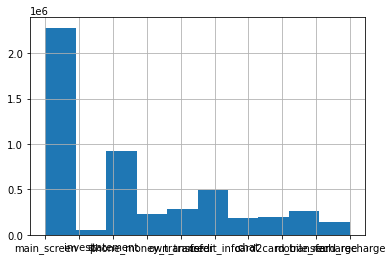

In [23]:
sub.multi_class_target.hist()

In [34]:
sample_pred = pd.read_csv(os.path.join(DATA, 'alfabattle2_abattle_sample_prediction.csv'))
sample_pred.shape

(79268, 2)

In [14]:
sample_pred.head(3)

,client_pin,prediction
0,f0c674b2bb4dc64be607029271d706ec,credit_info
1,90725b54ce77576883813d87749df6bd,credit_info
2,eb0f82d74c7b7bd5eafbd5b5f8cb3e2a,own_transfer


In [12]:
sample_pred.prediction.value_counts()

invest                  8055
mobile_recharge         8028
statement               7995
chat                    7989
card2card_transfer      7965
phone_money_transfer    7941
card_recharge           7936
main_screen             7893
own_transfer            7759
credit_info             7707
Name: prediction, dtype: int64

<AxesSubplot:>

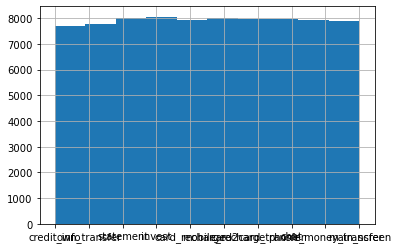

In [24]:
sample_pred.prediction.hist()

In [27]:
hz = pd.read_csv(os.path.join(DATA, 'alfabattle2_prediction_session_timestamp.csv'))
hz.shape

(79268, 2)

In [29]:
hz.head(3)

,client_pin,timestamp
0,f0c674b2bb4dc64be607029271d706ec,2020-08-01 00:00:53
1,90725b54ce77576883813d87749df6bd,2020-08-01 00:02:57
2,eb0f82d74c7b7bd5eafbd5b5f8cb3e2a,2020-08-01 00:03:14


In [32]:
same = 0
for el in hz.index:
    if hz.loc[el, 'client_pin'] in site_freq:
        same += 1

In [33]:
same

79268

In [35]:
same2 = 0
for el in hz.index:
    if sample_pred.loc[el, 'client_pin'] in site_freq:
        same2 += 1

In [36]:
same2

79268

In [91]:
answer_time_chack = data.groupby(['client', 'session_id']).timestamp.agg(min_val = 'min', max_val = 'max')

In [42]:
hz.head()

,client_pin,timestamp
0,f0c674b2bb4dc64be607029271d706ec,2020-08-01 00:00:53
1,90725b54ce77576883813d87749df6bd,2020-08-01 00:02:57
2,eb0f82d74c7b7bd5eafbd5b5f8cb3e2a,2020-08-01 00:03:14
3,831bf4c0ecccc55e536b8cfb9153d672,2020-08-01 00:04:44
4,3f1a5a1c492ce877af833113e59c5797,2020-08-01 00:06:40


In [93]:
answer_time_chack.index.client

AttributeError: 'MultiIndex' object has no attribute 'client'

In [99]:
answer_time_chack.loc[('0014a49ec89e3a43098375b107f8ff2e')].max_val.sort_values()

session_id
408d1bede65fe206e6a96236b5b7926c   2020-07-26 20:09:58.759
566e499407182adf4b549b81b7b1454f   2020-07-27 00:40:30.024
37caf3c7cee2803aa7dba1dc6ed9eec2   2020-08-05 00:08:22.010
5d49e593e92ff8eb427e807764c5e1aa   2020-09-17 13:13:16.331
54b583b9c395ec1206ce6988d540d239   2020-09-17 13:30:47.705
230bbd2be4ec56aff09c57566b248e86   2020-09-17 23:46:15.821
66efb9ad86d8f8c9dc7d1297d10eefe5   2020-09-19 17:52:54.407
9c0fa5115ffdd366016b48bd50809e0b   2020-09-19 22:06:24.259
6cfa431ddea45e1c02083c56b7ebe823   2020-09-20 04:59:43.947
7a41df4af4f15134c054bd0fe643feaf   2020-09-20 06:12:52.494
13c9eab5215d015776acb80675f9d70d   2020-09-20 10:23:22.583
48069522f65b7d4d6ae045613acd056b   2020-09-20 22:04:18.748
d02905c40b2c9af9107cc784a28d8e2e   2020-09-21 15:08:11.196
c0ce6653c05a71331f00cfa056bd408c   2020-09-21 17:19:20.949
2ee80c0a0d2a9a37c3c95c001508b198   2020-09-23 09:16:01.391
d350f1a18636fc9b6d3af1d1456975b0   2020-09-23 21:49:20.069
bc26f28b4846da59b3f9734938544125   2020-09-23

In [87]:
hz[hz.client_pin == '0014a49ec89e3a43098375b107f8ff2e']

,client_pin,timestamp
70673,0014a49ec89e3a43098375b107f8ff2e,2020-09-24 22:17:46


In [6]:
data.keys()

Index(['timestamp', 'application_id', 'client', 'session_id', 'event_type',
       'event_category', 'event_name', 'event_label', 'device_screen_name',
       'timezone', 'device_is_webview', 'page_urlhost', 'page_urlpath_full',
       'net_connection_type', 'net_connection_tech'],
      dtype='object')

In [17]:
%%time
data.groupby('session_id').timestamp.agg(['min', 'max', 'size'])

Wall time: 5.01 s


,min,max,size
session_id,,,
000011b33bb3d581fbbbcdadccb1d18e,2020-06-07 14:03:32.443,2020-06-07 14:03:46.822,9
0000161c6e8fba292c7b840f36d1b54c,2020-04-02 20:23:09.265,2020-04-02 20:30:39.608,11
00002c5dd9668ba4aba57ee532413481,2020-02-03 09:31:50.172,2020-02-03 09:31:53.490,2
000035c9654643a6fe4dfe21dde5a96b,2020-06-06 12:57:22.479,2020-06-06 12:58:21.641,24
00003f1c616d1e8d6643eb2602524118,2020-04-17 05:42:01.808,2020-04-17 05:42:39.135,21
...,...,...,...
ffffc4ddb56a5fba494cf975d37fe44e,2020-08-15 11:48:46.999,2020-08-15 11:49:17.881,12
ffffc72c4f99eaa09a6bc1eb2af01749,2020-02-17 22:32:19.287,2020-02-17 22:32:31.350,3
ffffe70156fd4035798fa61136852739,2020-02-06 14:49:46.581,2020-02-06 14:50:08.288,9


In [102]:
sess_file = []
for idx, file in tqdm(enumerate(files)):
    tmp_data = pd.read_parquet(file)
    tmp_sess_list = []
    sess_file.append( list(set(tmp_data.session_id)))

In [105]:
len(sess_file[0])

1004032

In [110]:
with open(os.path.join(DATA_OWN, 'sess_files.pickle'), 'wb') as f:
    pickle.dump(sess_file, f)

In [111]:
with open(os.path.join(DATA_OWN, 'site_freq.pickle'), 'wb') as f:
    pickle.dump(site_freq, f)

In [113]:
data.session_id.apply(lambda x: site_freq)

0           9a1366886da59ec85f0ef5e06f1e97f6
1           bdf7fc21e4e88d1b4f0838c80b21a1e3
2           8bae6c4249db74dc0937e1ff00d61079
3           3a95ba68795b745ca09ebee138b418ef
4           1db024ef087161f30a3c981cb32bb565
                          ...               
12468590    9d8aa6c49464f07a45a2b496eee5b193
12468591    5cd056f98664561704ef58ae59a6124d
12468592    42b9a039ec978fdc0f6dcc6cf7f97f0c
12468593    c03f01cc074be9a693648654dc0e5e57
12468594    c03f01cc074be9a693648654dc0e5e57
Name: session_id, Length: 12468595, dtype: object

In [114]:
site_freq

{None: (0, 115670971),
 'online.alfabank.ru': (1, 1995913),
 'click.alfabank.ru': (2, 1072271),
 'anketa.alfabank.ru': (3, 646126),
 'alfabank.ru': (4, 575552),
 'ipoteka.alfabank.ru': (5, 50101),
 'travel.alfabank.ru': (6, 13977),
 'family.alfabank.ru': (7, 92),
 'partner.alfabank.ru': (8, 81),
 'private.auth.alfabank.ru': (9, 62),
 'investments.alfabank.ru': (10, 57),
 'business.auth.alfabank.ru': (11, 55),
 'AlfaBank.ru': (12, 26),
 'my.alfabank.ru': (13, 2)}

In [ ]:
invest                  8055
mobile_recharge         8028
statement               7995
chat                    7989
card2card_transfer      7965
phone_money_transfer    7941
card_recharge           7936
main_screen             7893
own_transfer            7759
credit_info             7707

In [124]:
%%time

first_site = []
second_site = []
sess_len = []
sess_id = ''

for file in (files):
    sess_tmp = []
    tmp_data = pd.read_parquet(file)
    for idx, el in tqdm(enumerate(tmp_data.session_id)):
        #if el not in sess_tmp:
        if el != sess_id:
            #sess_tmp.append(el)
            sess_id = el
            first_site.append(tmp_data.loc[idx, 'page_urlhost'])
            if (idx+1) < tmp_data.shape[0]:
                second_site.append(tmp_data.loc[idx+1, 'page_urlhost'])
            else:
                second_site.append('None')
            


Wall time: 56min 33s


In [125]:
with open(os.path.join(DATA_OWN, 'first_site.pickle'), 'wb') as f:
    pickle.dump(first_site, f)
    
with open(os.path.join(DATA_OWN, 'second_site.pickle'), 'wb') as f:
    pickle.dump(second_site, f)

In [ ]:
hist(second_site)